In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Kota.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Amar Punjabi Foods,250,North Indian,Kota,Talwandi,Casual Dining,11am to 1030pm(Mon-Sun),Excellent,4.8,2051
1,Anand Shekhawati Dhaba,150,North Indian,Kota,Talwandi,Quick Bites,11am to 1030pm(Mon-Sun),Excellent,4.5,461
2,Gouri Hotel,500,"North Indian,Mughlai",Kota,Ladpura,Casual Dining,11am to 11pm(Mon-Sun),Excellent,4.6,652
3,Firdous,350,"Biryani,Chinese,North Indian,Mughlai",Kota,Rangbari,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.1,463
4,Pathak Restaurant,350,Fast Food,Kota,Dadabari,Quick Bites,"11am to 1030pm(Mon),11am to 11pm(Tue-Sun)",Very Good,4.4,421


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
Name                368 non-null object
Price               368 non-null int64
Cuisine_Category    368 non-null object
City                368 non-null object
Region              368 non-null object
Cuisine_Type        368 non-null object
Timing              367 non-null object
Rating_Types        368 non-null object
Rating              368 non-null float64
Votes               368 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 28.8+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,368.000000,368.000000,368.000000
mean,301.576087,3.491848,61.855978
std,159.282159,0.398552,135.841282
min,50.000000,2.500000,4.000000
25%,200.000000,3.200000,11.000000
50%,250.000000,3.500000,25.000000
75%,400.000000,3.800000,66.250000
max,1000.000000,4.800000,2051.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              1
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Ganpati Plaza Bakery         2
Shambhu Mishtan Bhandar      2
Muradabadi Chicken Center    2
Al Kareem                    2
Amar Punjabi Foods           1
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Talwandi                        124
Rangbari                         77
Chawani                          44
Ladpura                          41
Indraprastha Industrial Area     29
Dadabari                         16
Kota Industrial Area              8
RK Puram - E                      8
Dhanmandi                         7
RPS Colony                        6
Name: Region, dtype: int64

Text(0.5,1,'Region')

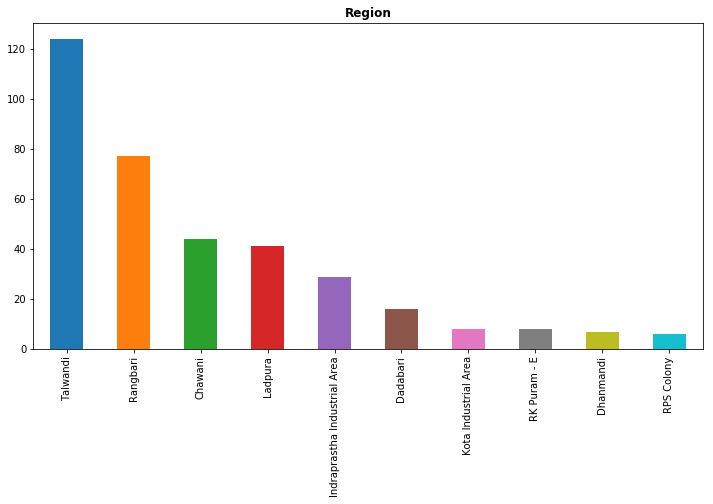

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

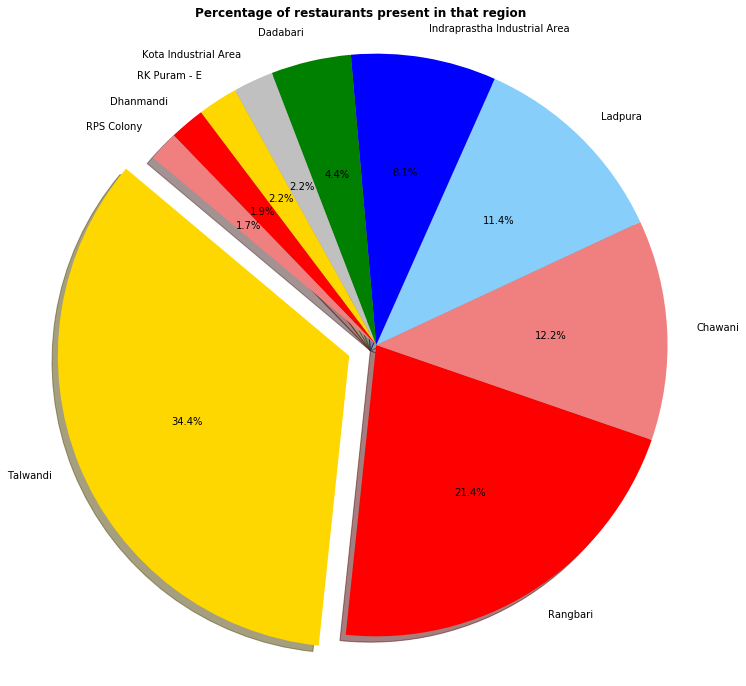

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      170
Good         151
Very Good     43
Excellent      4
Name: Rating_Types, dtype: int64

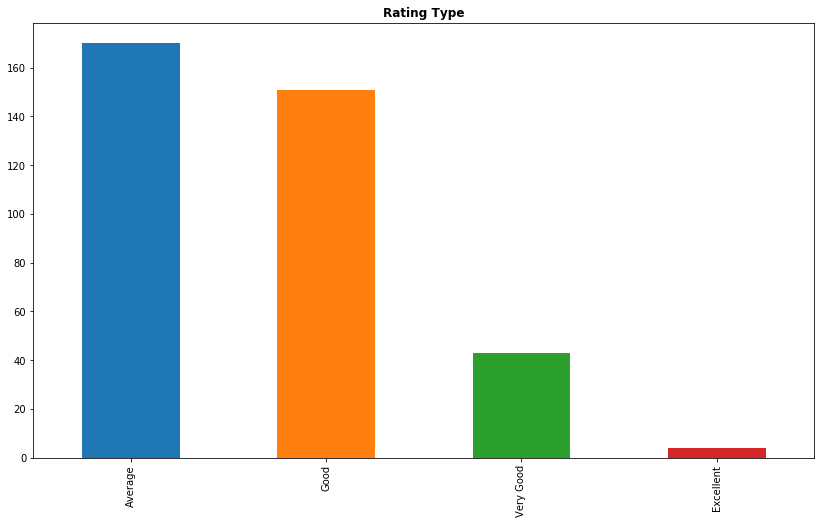

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       195
Casual Dining      56
Café               24
Kiosk              17
none               14
Sweet Shop         14
Bakery             13
Dessert Parlor     11
Beverage Shop       5
Mess                4
Name: Cuisine_Type, dtype: int64

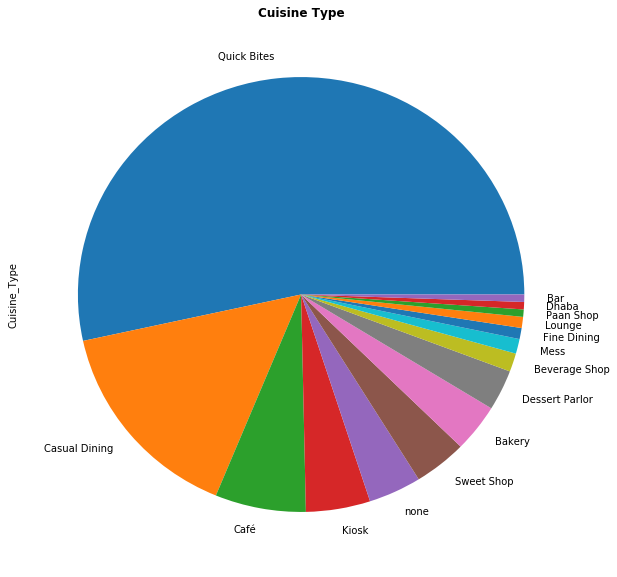

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4923705722070872


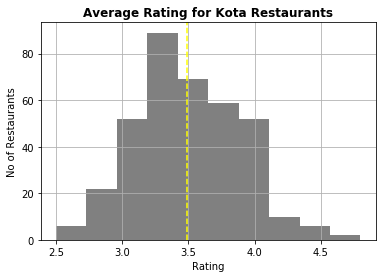

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Kota Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Kota is found to be around 3.5

# Top cuisines in Kota

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

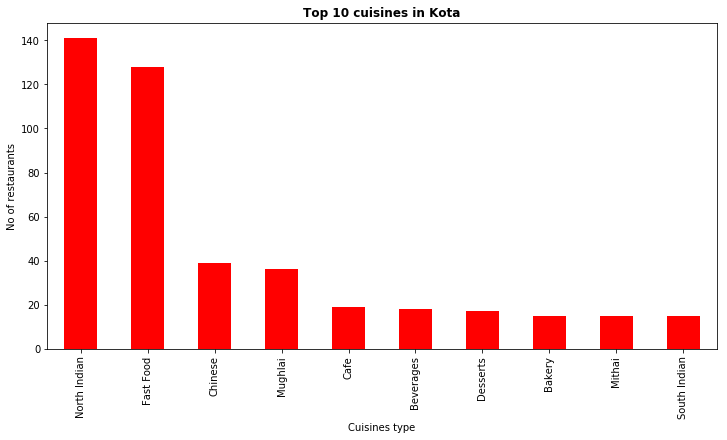

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Kota',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

200     70
300     61
250     57
150     42
400     37
500     31
100     22
350     14
600      9
800      7
700      5
450      5
1000     2
900      1
160      1
120      1
50       1
550      1
Name: Price, dtype: int64

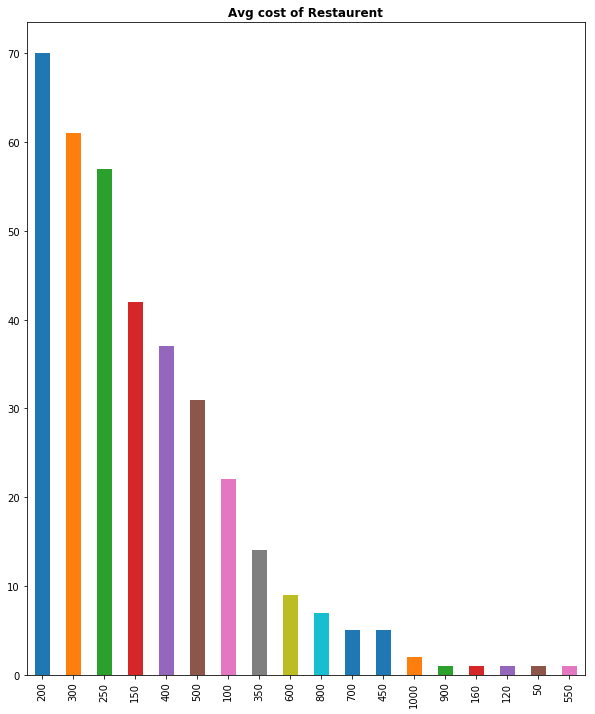

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

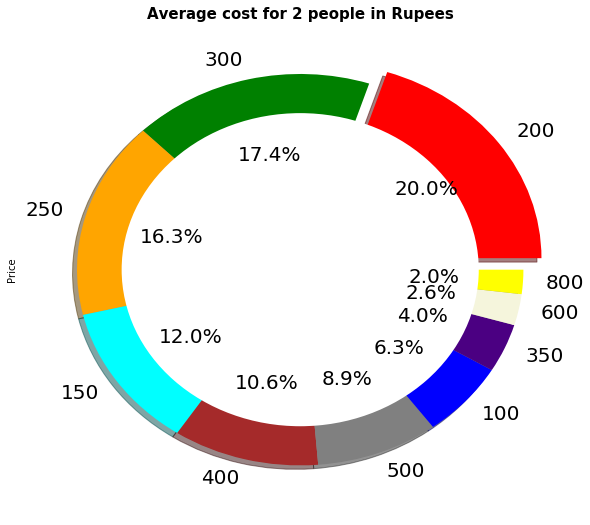

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 200